<a href="https://colab.research.google.com/github/jonatanriq/oceanografia/blob/main/plotando_dados_ctd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Neste Notebook, vou realizar uma simples visualização dos dados de CTD

Esse notebook é bem *straight foward*. Basicamente vou aplicar um recorte e plotar os dados.

### Importando os pacotes e o dataset

In [3]:
import pandas as pd

In [4]:
data = pd.read_csv('/content/ctd_final.csv', sep=',')
# aplicando o recorte
data = data.iloc[1:1499]
data

,EXPOCODE,LATITUDE,LONGITUDE,DEPTH,CTDPRS,CTDTMP,CTDSAL,OXYGEN,SILCAT,NITRAT,PHSPHT
1,29HE20100405,-3.6992,-34.2917,3902,1505.3,4.4083,34.9548,226.7,20.35,22.55,1.40
2,29HE20100405,-3.6992,-34.2917,3902,1402.0,4.5221,34.9294,212.3,21.86,24.04,1.49
3,29HE20100405,-3.6992,-34.2917,3902,1298.3,4.5499,34.8413,191.4,25.77,27.34,1.73
4,29HE20100405,-3.6992,-34.2917,3902,1200.0,4.5381,34.7762,180.4,27.97,29.16,1.87
5,29HE20100405,-3.6992,-34.2917,3902,1099.7,4.3932,34.6868,171.6,30.65,31.12,2.01
...,...,...,...,...,...,...,...,...,...,...,...
1494,29HE20100405,8.3318,-14.5005,1606,399.4,9.2879,34.9651,49.2,17.55,37.32,2.37
1495,29HE20100405,8.3318,-14.5005,1606,298.8,11.1645,35.1973,49.4,14.01,33.59,2.11
1496,29HE20100405,8.3318,-14.5005,1606,199.8,13.9456,35.4122,78.3,9.80,25.84,1.69
1497,29HE20100405,8.3318,-14.5005,1606,101.4,16.0951,35.6454,72.0,8.34,23.41,1.58


### Importando mais pacotes, necessários para plotagem

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns # excelente pacote para visualização dos dados!
import numpy as np
from matplotlib.ticker import MultipleLocator

In [6]:
# vou atribuir o dtype numerico para essas colunas
for atributo in ['DEPTH','CTDPRS','CTDTMP','CTDSAL','OXYGEN','SILCAT','NITRAT','PHSPHT']:
    data[atributo] = pd.to_numeric(data[atributo], errors='coerce')

### Plotagem

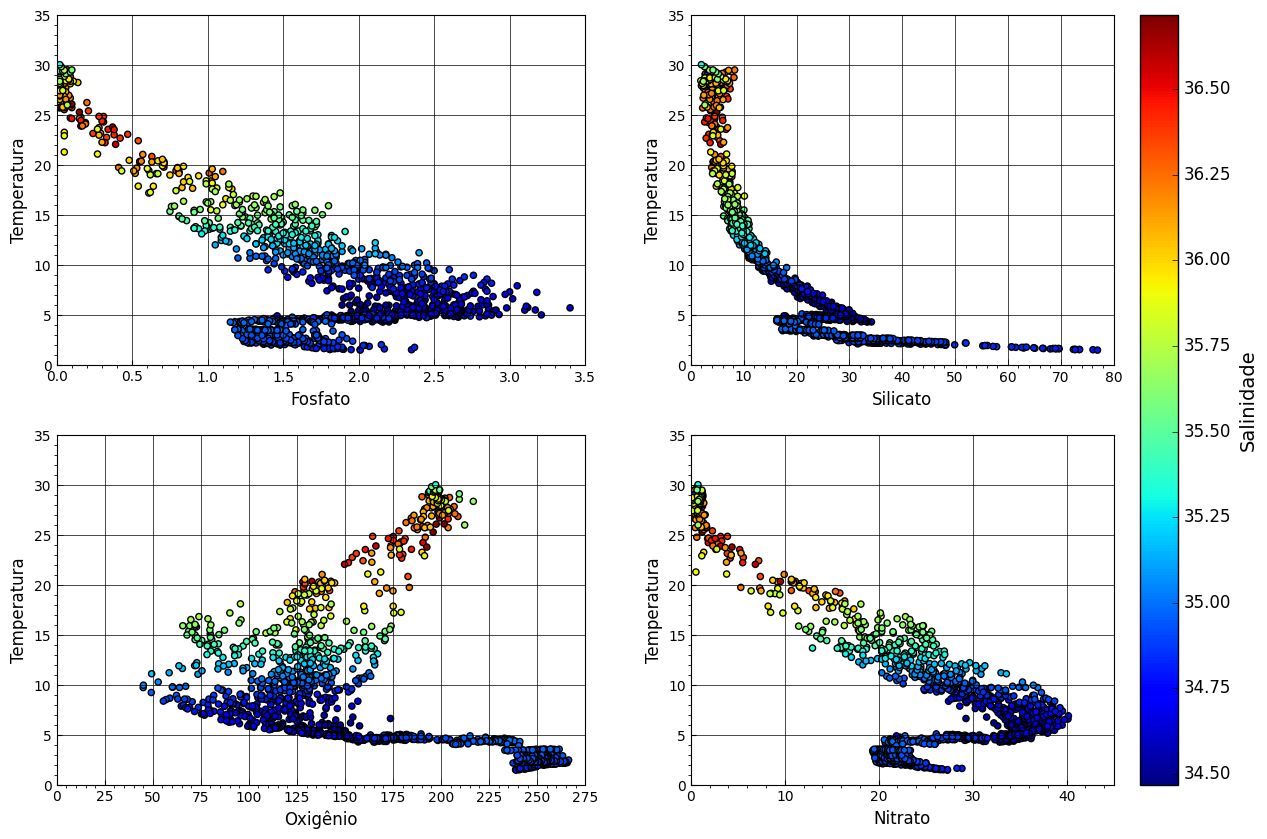

In [16]:
fig, ax = plt.subplots(2,2, figsize=(15,10))

plt.style.use('classic')
fig.patch.set_facecolor('white')

ax[0,0].scatter(data.PHSPHT, data.CTDTMP, c=data.CTDSAL,cmap='jet')
ax[0,0].set_ylabel('Temperatura',fontsize=12)
ax[0,0].set_xlabel('Fosfato',fontsize=12)
ax[0,0].set_yticks(range(0,36,5))
ax[0,0].set_xticks(np.arange(0,3.6,0.5))
ax[0,0].set_xlim(0,3.5)
ax[0,0].grid(color='k',linestyle='-',linewidth=0.5)
ax[0,0].minorticks_on()
ax[0,0].tick_params(axis="y",direction="in",)
ax[0,0].tick_params(axis="x",direction="in",)

ax[0,1].scatter(data.SILCAT, data.CTDTMP, c=data.CTDSAL,cmap='jet')
#plt.colorbar(points,label='Salinidade')
ax[0,1].set_ylabel('Temperatura',fontsize=12)
ax[0,1].set_xlabel('Silicato',fontsize=12)
ax[0,1].set_yticks(range(0,36,5))
ax[0,1].set_xticks(np.arange(0,81,10))
ax[0,1].set_xlim(0,80)
ax[0,1].set_ylim(0,35)
ax[0,1].grid(color='k',linestyle='-',linewidth=0.5)
ax[0,1].minorticks_on()
ax[0,1].tick_params(axis="y",direction="in",)
ax[0,1].tick_params(axis="x",direction="in",)


ax[1,0].scatter(data.OXYGEN, data.CTDTMP, c=data.CTDSAL,cmap='jet')
ax[1,0].set_ylabel('Temperatura',fontsize=12)
ax[1,0].set_xlabel('Oxigênio',fontsize=12)
ax[1,0].set_yticks(range(0,36,5))
ax[1,0].set_xticks(np.arange(0,280,25))
ax[1,0].set_xlim(0,275)
ax[1,0].grid(color='k',linestyle='-',linewidth=0.5)
ax[1,0].minorticks_on()
ax[1,0].tick_params(axis="y",direction="in",)
ax[1,0].tick_params(axis="x",direction="in",)

img = ax[1,1].scatter(data.NITRAT, data.CTDTMP, c=data.CTDSAL,cmap='jet')

ax[1,1].set_ylabel('Temperatura',fontsize=12)
ax[1,1].set_xlabel('Nitrato',fontsize=12)
ax[1,1].set_xlim(0,45)
ax[1,1].set_ylim(0,35)
ax[1,1].grid(color='k',linestyle='-',linewidth=0.5)
ax[1,1].minorticks_on()
ax[1,1].tick_params(axis="y",direction="in",)
ax[1,1].tick_params(axis="x",direction="in",)

cbar = fig.colorbar(img, ax=ax[:, 1],label='Salinidade')
cbar.ax.tick_params(labelsize=12)
cbar.set_label(label='Salinidade',fontsize=14)
plt.show()